<a href="https://colab.research.google.com/github/AthithyaJB/AthithyaJB/blob/main/Week06_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# When running on Colab, get access to Google Drive to read the d2l utility file
try:
    from google.colab import drive
    drive.mount('/gdrive', force_remount=True)
    import sys
    sys.path.append('/gdrive/MyDrive/Colab Notebooks')
except:
    pass

Mounted at /gdrive


In [2]:
import d2l
import torch
from torch import nn

# The Task

* Our **Task** for this week is to implement LeNet.
* The Learning Outcome: Hands-on application of PyTorch's API for creating and training CNNs.



# LeNet

* At a high level, LeNet (LeNet-5) consists of 2 parts:
    1. a convolutional encoder consisting of two convolutional layers; and
    2. a dense block consisting of three fully-connected layers;

<!-- ![Data flow in LeNet. The input is a handwritten digit, the output a probability over 10 possible outcomes.](img/lenet.svg) -->

<img src="http://d2l.ai/_images/lenet.svg" alt="Data flow in LeNet. The input is a handwritten digit, the output a probability over 10 possible outcomes." style="display: block; margin: auto"/>

# LeNet -- Convolutional Encoder

* Each convolutional *block* consists of: 
    * A convolutional layer.
    * A sigmoid activation function (ReLUs were discovered recently).
    * A subsequent average pooling operation (max pooling was discovered later).
* Each convolutional layer uses a $5\times 5$ kernel.
* The first convolutional layer has 6 output channels, while the second has 16.
* Each $2\times2$ pooling operation (stride 2) reduces dimensionality by a factor of $4$ via spatial downsampling.
* The convolutional block emits an output with shape given by (batch size, number of channels, height, width).

# LeNet -- Dense Block

* In order to pass the output from the convolutional block to the dense block, we must flatten each example in the minibatch.
* In other words, we take the four-dimensional input and transform it into the two-dimensional input expected by fully-connected layers:
    * the two-dimensional representation that we desire uses the first dimension to index examples in the minibatch
    * the second to give the flat vector representation of each example.
* LeNet's dense block has three fully-connected layers, with 120, 84, and 10 outputs, respectively.
    * Because we are still performing classification, the 10-dimensional output layer corresponds to the number of possible output classes.

# Compressed LeNet Representation 

<img src="http://d2l.ai/_images/lenet-vert.svg" alt="Compressed notation for LeNet-5." style="display: block; margin: auto"/>

# Concise Implementation of LeNet

* Goal: use high-level APIs of PyTorch for implementing LeNet for classification. 

In [3]:
# Read training and test data
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
# type(train_iter)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Defining the Model

* We will modify the code from MLP




In [58]:
#Please add your code for LeNet
class LeNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6, kernel_size=5, padding = 2)
        self.pool1 = nn.AvgPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16, kernel_size=5, padding = 0)
        self.pool2 = nn.AvgPool2d(2,2)
        self.fc1 = nn.Linear(in_features = 400, out_features =120)
        self.fc2 = nn.Linear(in_features = 120, out_features =84)
        self.fc3 = nn.Linear(in_features = 84, out_features = 10)
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.pool1(x1)
        x3 = self.conv2(x2)
        x4 = self.pool2(x3)
        x5 = torch.reshape(x4, (x4.size(0), -1))
        out1 = self.fc1(x5)
        out2 = self.fc2(out1)
        out3 = self.fc3(out2)
        return out3

In [59]:
nn.Linear?

In [60]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d: # by checking the type we can init different layers in different ways
        torch.nn.init.xavier_uniform_(m.weight)          

num_outputs = 10
model = LeNet()

model.apply(init_weights);
print(model)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (sig): Sigmoid()
)


# Loss and Optimization Algorithm
* As in Softmax Regression

In [61]:
loss = nn.CrossEntropyLoss()
lr = 0.9
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Training

* Use `d2l.train_ch3` as in Softmax Regression

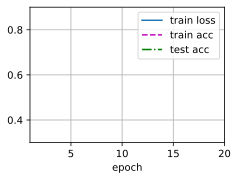

In [ ]:
num_epochs = 20
d2l.train_ch3(model, train_iter, test_iter, loss, num_epochs, optimizer)